In [188]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

[ WARN:0@4422.968] global cap_gstreamer.cpp:1173 isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


(960, 1280, 3)


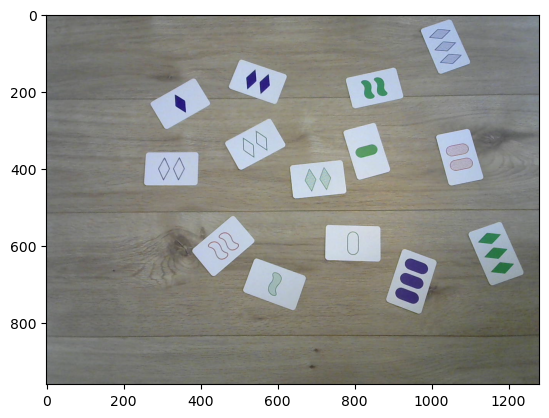

In [189]:


# Initialize webcam (0 = default camera)
cam = cv2.VideoCapture(0)

# Capture one frame
cv2.waitKey(1000)  # Wait for the camera to warm up
ret, frame = cam.read()

if ret:
    # Convert BGR to RGB for displaying with matplotlib
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame_rgb = np.array(frame_rgb)
    # Display the captured image
    plt.imshow(frame_rgb)
    # plt.axis('off')  # Hide axis
    # plt.show()
    print(frame_rgb.shape)

else:
    print("Failed to capture image.")
cam.release()

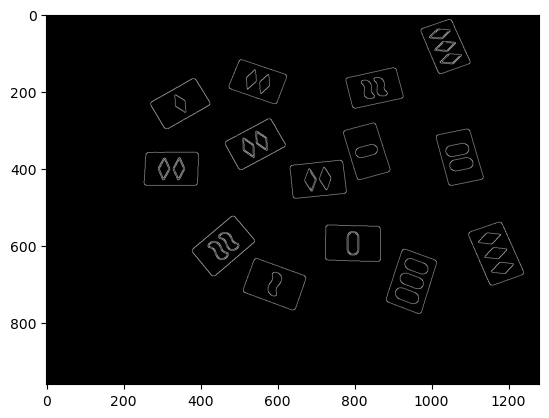

In [190]:
# Aplly grayscale conversion
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Gaussian Blur to reduce noise and improve edge detection
blured = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny edge detection
edges = cv2.Canny(blured, 100, 200)
# Display the edges
plt.imshow(edges, cmap='gray')
# plt.axis('off')  # Hide axis
# plt.show()


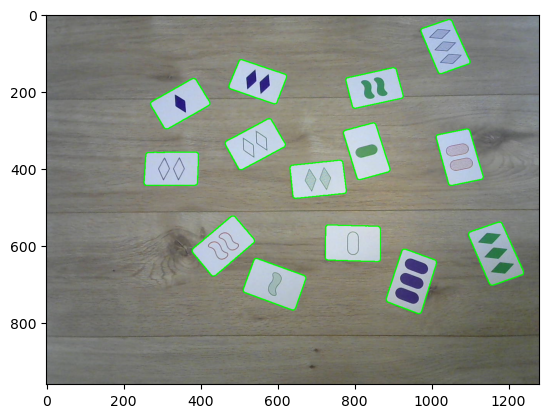

In [191]:
# find the contours from the edged image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# draw the contours on the original image
contour_image = frame.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)
# Display the image with contours
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))

In [192]:
len(contours)

14

In [196]:
# mean value of all areas
mean_area = np.mean([cv2.contourArea(c) for c in contours])
std_area = np.std([cv2.contourArea(c) for c in contours])
print("Number of contours detected:", len(contours))
print("Mean area of contours:", mean_area)
print("Standard deviation of areas:", std_area)

Number of contours detected: 14
Mean area of contours: 12149.42857142857
Standard deviation of areas: 1105.5050697231893


In [194]:
# Delete all areas smaller than the std
filtered_contours = [c for c in contours if cv2.contourArea(c) >= std_area]
print("Number of contours after filtering:", len(filtered_contours))

Number of contours after filtering: 14


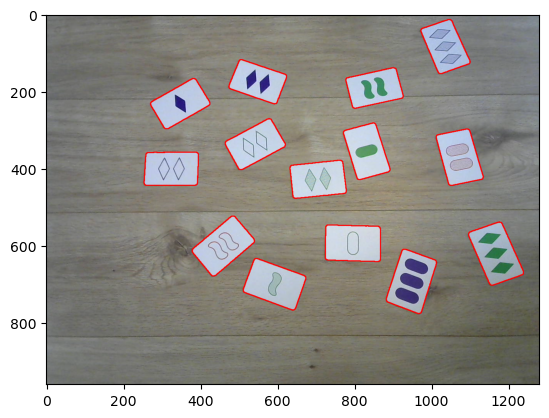

In [195]:
# Draw filtered contours
filtered_contour_image = frame.copy()
cv2.drawContours(filtered_contour_image, filtered_contours, -1, (0, 0, 255), 2)
# Display the image with filtered contours
plt.imshow(cv2.cvtColor(filtered_contour_image, cv2.COLOR_BGR2RGB))
